<a href="https://colab.research.google.com/github/kssmp/Data_Science_Salaries/blob/main/Data_Science_Job_Salaries_(for_GitHub_display).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on Data Science Jobs and Salaries**

Information about Dataset :


*   Contains 600+ entries on different Data Science Streams and their respective salaries
*   Source : https://shorturl.at/nyAE0

Objectives :


*   Visualize various factors like employee locations and various positions and their effects on Salaries






In [ ]:
# Importing various Libraries needed for data management and visualization
#!pip install country_converter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import country_converter as coco
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("ds_salaries.csv")
df.sample(5).reset_index(drop= True).style.set_properties(**{'background-color' : '#fabee9','color':'black', 'border-color' : '#000000'})

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,195,2021,MI,FT,Data Scientist,147000,USD,147000,US,50,US,L
1,279,2021,EN,FT,Business Data Analyst,50000,EUR,59102,LU,100,LU,L
2,371,2022,SE,FT,Machine Learning Engineer,189650,USD,189650,US,0,US,M
3,251,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S
4,68,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [ ]:
# Checking for any missing values
pd.isna(df).any().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
# replacing some values so as to make subsequent tables more understandable
df.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote', 'On-site'],inplace = True)
df.experience_level.replace(['EN','MI','SE','EX'],['Entry','Mid','Senior','Executive'],inplace = True)
df.employment_type.replace(['FT','PT','CT','FL'],['Full Time','Part Time','Contract','Freelance'],inplace = True)

In [ ]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid,Full Time,Data Scientist,70000,EUR,79833,DE,On-site,DE,L
1,1,2020,Senior,Full Time,Machine Learning Scientist,260000,USD,260000,JP,On-site,JP,S
2,2,2020,Senior,Full Time,Big Data Engineer,85000,GBP,109024,GB,Partially Remote,GB,M
3,3,2020,Mid,Full Time,Product Data Analyst,20000,USD,20000,HN,On-site,HN,S
4,4,2020,Senior,Full Time,Machine Learning Engineer,150000,USD,150000,US,Partially Remote,US,L


In [ ]:
df.shape

(607, 12)

In [ ]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd
count,607.000000,607.000000,6.070000e+02,607.000000
mean,303.000000,2021.405272,3.240001e+05,112297.869852
std,175.370085,0.692133,1.544357e+06,70957.259411
min,0.000000,2020.000000,4.000000e+03,2859.000000
25%,151.500000,2021.000000,7.000000e+04,62726.000000
50%,303.000000,2022.000000,1.150000e+05,101570.000000
75%,454.500000,2022.000000,1.650000e+05,150000.000000
max,606.000000,2022.000000,3.040000e+07,600000.000000


In [ ]:
df.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

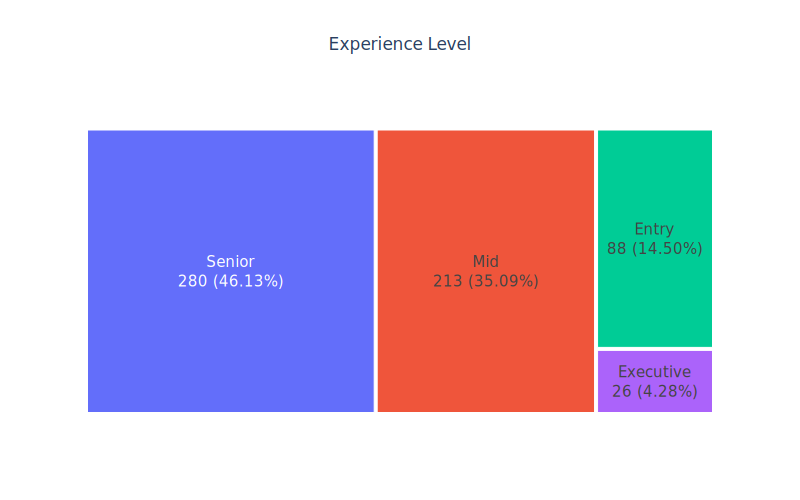

In [ ]:
# Creating a Tree map plot to visualize Experience level percentage in each Position of Responsibility
ex_level = df['experience_level'].value_counts()
ex_level_percentage = (ex_level / len(df) * 100).round(2)

fig = go.Figure(go.Treemap(
    labels=ex_level.index,
    parents=[""] * len(ex_level),
    values=ex_level.values,
    text=[f"{count} ({percentage:.2f}%)" for count, percentage in zip(ex_level.values, ex_level_percentage)],
    textposition="middle center"
))

fig.update_traces(textfont_size=15)
fig.update_layout(
    title="Experience Level",
    width=800,
    height=500,
    title_x=0.5,
)

fig.show("svg")

Based on the provided treemap, it is apparent that the Senior-level/Expert category holds the highest position, followed by the Mid-level/Intermediate category. The Entry Level category follows next, while interestingly, the Executive category is placed at the bottom.


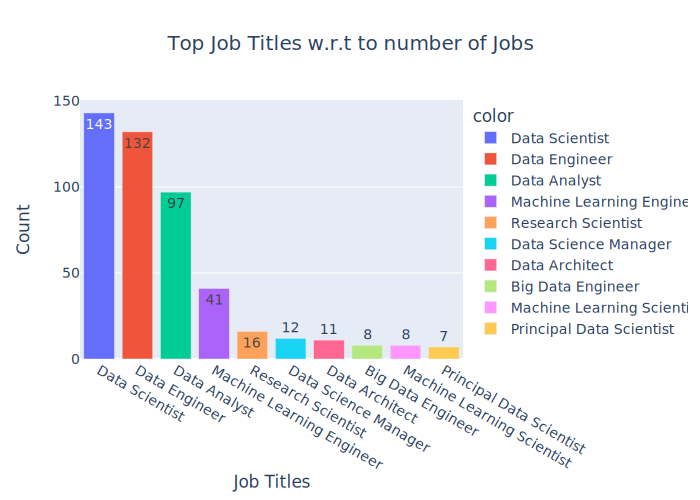

In [ ]:
# Visualizing the number of Jobs in each Data Science stream

top_jobs = df['job_title'].value_counts()[:10]
fig = px.bar(x=top_jobs.index,
             y=top_jobs.values,
             orientation='v',
             color = top_jobs.index,
             text = top_jobs.values,
             title='Top Job Titles w.r.t to number of Jobs')

fig.update_layout(yaxis_title='Count',
                  xaxis_title='Job Titles',
                  title_x=0.5,
                  font = dict(size = 14))
fig.show("svg")

As per the usual trend, the top two positions are occupied by Data Engineer and Data Scientist, with Data Analyst and Machine Learning Engineer following closely behind.

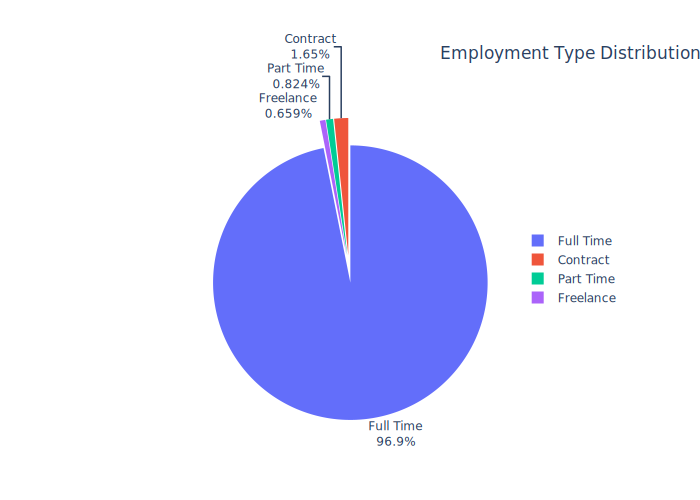

In [ ]:
# Employment Type Distribution using Pie Chart
fig = px.pie(df, values=df['employment_type'].value_counts(normalize=True) * 100, names=df['employment_type'].unique(), title='Employment Type Distribution')
fig.update_traces(textposition='outside', textinfo='percent+label', pull=[0.1]*len(df['employment_type'].unique()))
fig.update_layout(legend=dict(x=0.85, y=0.5),title_x=1)

fig.show("svg")

The pie chart clearly indicates that the majority of employment within the provided dataset is comprised of Full-time employees.

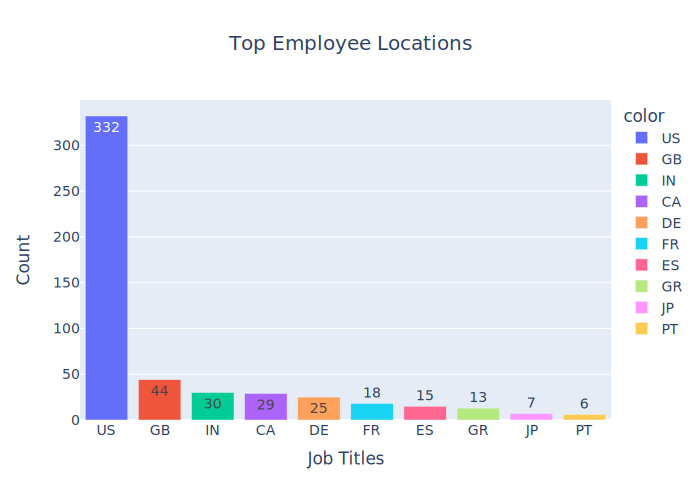

In [ ]:
# Top Employee Locations Visualized though a Bar Graph
loca = df['employee_residence'].value_counts()[:10]
fig = px.bar(x=loca.index,
             y=loca.values,
             orientation='v',
             color = loca.index,
             text = loca.values,
             title='Top Employee Locations')

fig.update_layout(yaxis_title='Count',
                  xaxis_title='Job Titles',
                  title_x=0.5,
                  font = dict(size = 14))
fig.show("svg")

In terms of number of employees, USA leads followed by GBR, ESP and then IND.

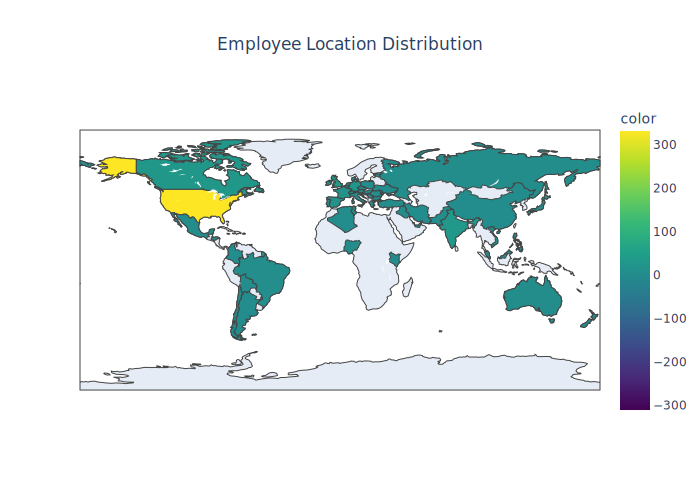

In [ ]:
# Location Distribution on the world map using country_converter Library
converted_country = coco.convert(names=df['employee_residence'], to='ISO3')
df['employee_residence'] = converted_country

# Count the number of occurrences for each residence
residence = df['employee_residence'].value_counts()
midpoint = residence.mean()
fig = px.choropleth(locations=residence.index,
                    locationmode="ISO-3",
                    color=residence.values,
                    title='Employee Location Distribution',
                    color_continuous_scale='Viridis',
                    color_continuous_midpoint=midpoint)
fig.update_layout(title_x=0.5)

fig.show("svg")

Most of the employees are from USA as can be seen from the chloropleth above.

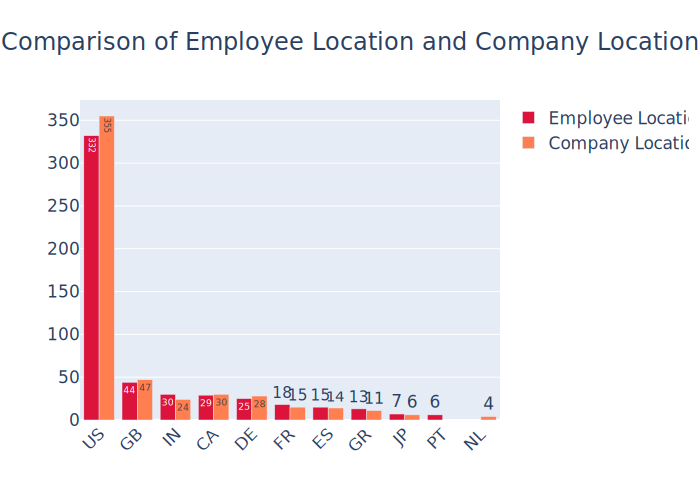

In [ ]:
# Comparing values of employee and company location
c_location = df['company_location'].value_counts()
top_10_company_location = c_location[:10]
fig = go.Figure(data=[
    go.Bar(name='Employee Location',
           x=loca.index, y=loca.values,
           text=loca.values,marker_color='crimson'),
    go.Bar(name='Company Location', x=top_10_company_location.index,
           y=top_10_company_location.values,text=top_10_company_location.values,marker_color='coral')
])
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparison of Employee Location and Company Location',
                  title_x=0.5,
                  font = dict(size=17,family="Franklin Gothic"))

fig.show("svg")


As of 2023, most countries have similar number of employee residences and company locations.

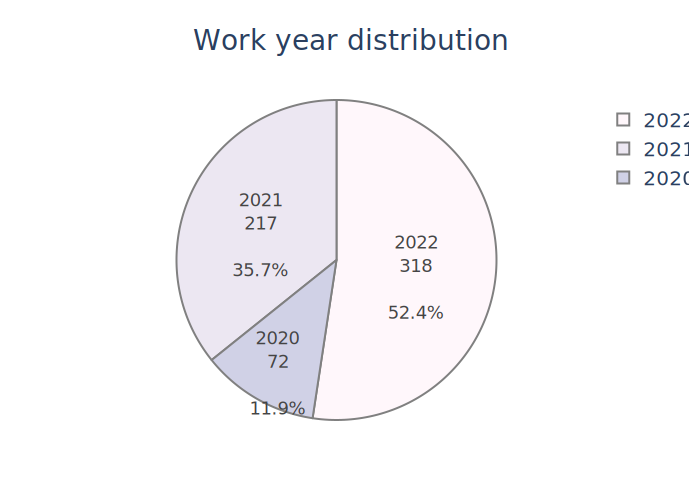

In [ ]:
# Data Set distribution w.r.t year
wkyear = df['work_year'].value_counts()
fig = px.pie(values=wkyear.values,
             names=wkyear.index,
             title= 'Work year distribution',
             color_discrete_sequence=px.colors.sequential.PuBu,)
fig.update_traces(textinfo='label+percent+value', textfont_size=18,
                  )

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"),
    title_x=0.5)
fig.show("svg")

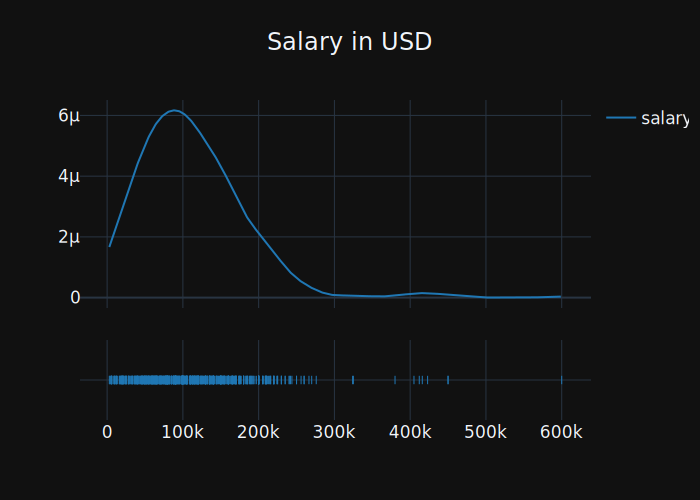

In [ ]:
# DistPlot of Salaries
hist_data = [df['salary_in_usd']]
group_labels = ['salary']
fig2 = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig2.layout.template = 'plotly_dark'
fig2.update_layout(title='Salary in USD', font = dict(size=17, family="Franklin Gothic"),title_x=0.5)
fig2.show("svg")

It is evident that the salary distribution in USD is predominantly concentrated within the range of 95/100k to 175/180k.

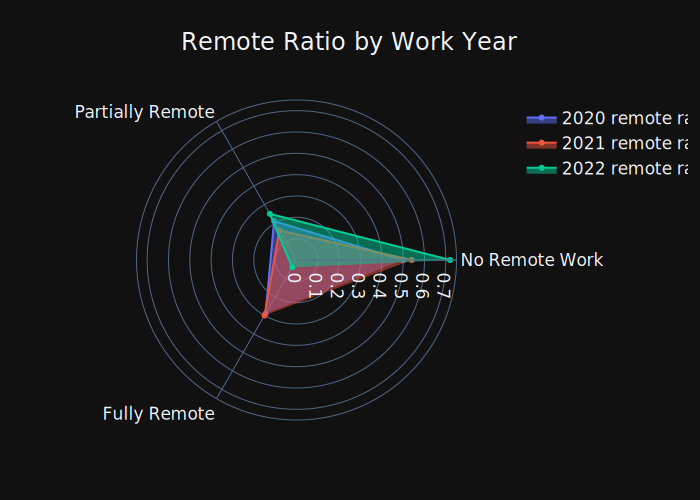

In [ ]:
# Polar Scatter plot for visualization for work place w.r.t year
remote_year = df.groupby(['work_year','remote_ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
fig = go.Figure()
categories = ['No Remote Work', 'Partially Remote', 'Fully Remote']
fig.add_trace(go.Scatterpolar(
             r = ratio_2020,
             theta = categories,
             fill = 'toself',
             name = '2020 remote ratio'
             ))
fig.add_trace(go.Scatterpolar(
             r = ratio_2021,
             theta = categories,
             fill = 'toself',
             name = '2021 remote ratio'
             ))
fig.add_trace(go.Scatterpolar(
             r = ratio_2022,
             theta = categories,
             fill = 'toself',
             name = '2022 remote ratio'
             ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      range=[0, 0.75]
    )),
  font = dict(family="Franklin Gothic", size=17),
  showlegend=True,
  title = 'Remote Ratio by Work Year',
  title_x=0.5
)
fig.layout.template = 'plotly_dark'
fig.show("svg")

As from the rader plot, we observe that :

Remote work peaked during 2021 and that could be attributed to the pandemic. With time, no remote work policy has been applied again as it is the case for 2023.

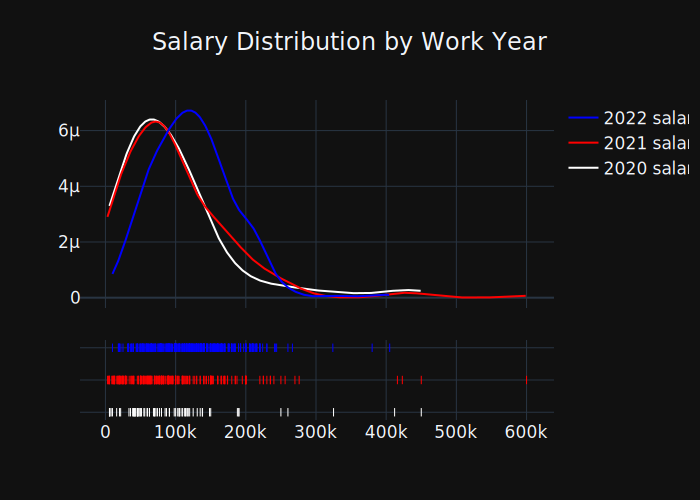

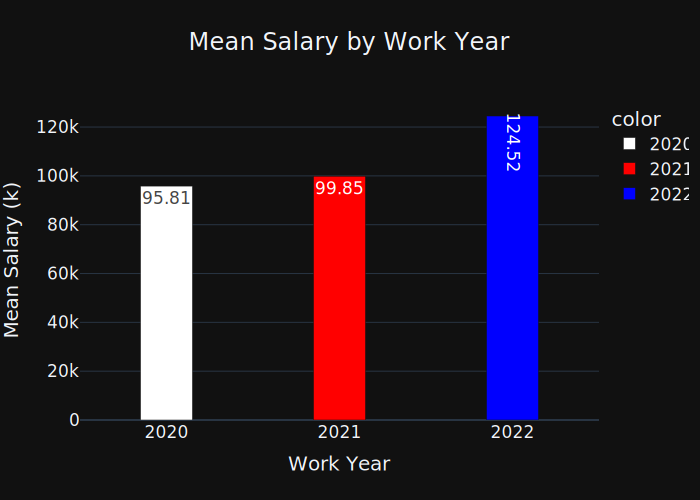

In [ ]:
# Salaries w.r.t work year
w2020 = df.loc[(df['work_year'] == 2020)]
w2021 = df.loc[(df['work_year'] == 2021)]
w2022 = df.loc[(df['work_year'] == 2022)]
hist_data = [w2020['salary_in_usd'],w2021['salary_in_usd'],w2022['salary_in_usd']]
group_labels = ['2020 salary','2021 salary','2022 salary']
colors = ['white','red','blue']

year_salary = pd.DataFrame(columns=['2020','2021','2022'])
year_salary['2020'] = w2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = w2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = w2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False,colors=colors)
fig2 = go.Figure(data=px.bar(x= year_salary.columns,
                            y=year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            color_discrete_sequence= colors,
                            title='Mean Salary by Work Year',
                            text = np.round([num/1000 for num in year_salary.values.tolist()[0]],2),
                            height=500))
fig1.update_layout(title='Salary Distribution by Work Year', font = dict(size=17,family="Franklin Gothic"),
                   title_x=0.5)
fig2.update_traces(width=0.3)
fig2.update_layout(
    xaxis_title="Work Year",
    yaxis_title="Mean Salary (k)",
    font = dict(size=17,family="Franklin Gothic"),
    title_x=0.5)
fig1.layout.template = 'plotly_dark'
fig2.layout.template = 'plotly_dark'
fig1.show("svg")
fig2.show("svg")


There are higher salary amounts in 2023 and 2022 than the levels in 2021 and 2020.

The salary levels in 2021 and 2020 are about the same.

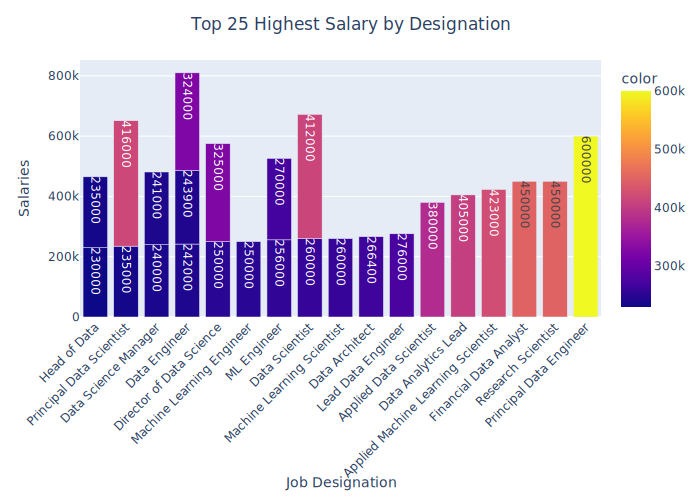

In [ ]:
salary_designation = df.groupby(['salary_in_usd', 'job_title']).size().reset_index()
salary_designation = salary_designation[-25:]
fig = px.bar(x = salary_designation['job_title'], y = salary_designation['salary_in_usd'],
            text = salary_designation['salary_in_usd'], color = salary_designation['salary_in_usd'])

fig.update_layout( xaxis_title = "Job Designation", yaxis_title = "Salaries ")
fig.update_layout(xaxis_tickangle = -45,
                  title = 'Top 25 Highest Salary by Designation',
                  title_x=0.5
                  )
fig.show("svg")

After performing data cleaning and loading it into our file, we have successfully utilized visualization libraries such as Matplotlib and Plotly to derive various insights from the data.